In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
dHp = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/virgili emails/dHp.txt')

In [4]:


n,n = dHp.shape
adj = np.ones((n,n))

# -------------------------------------------------------
# create graph
gg = nx.Graph()
adj = np.zeros((n,n))

for i in range(n):
    gg.add_node(i)

r,c = dHp.shape
for i in range(r):
  for j in range(c):
    if dHp[i,j]==1:
      adj[i,j] = 1

for i in range(r):
    for j in range(c):
        if adj[i,j]==1: #detecting where there is an edge
            gg.add_edge(i,j)

In [5]:


print(nx.info(gg))



Name: 
Type: Graph
Number of nodes: 1133
Number of edges: 5451
Average degree:   9.6222


In [ ]:
print(nx.is_connected(fb))

True


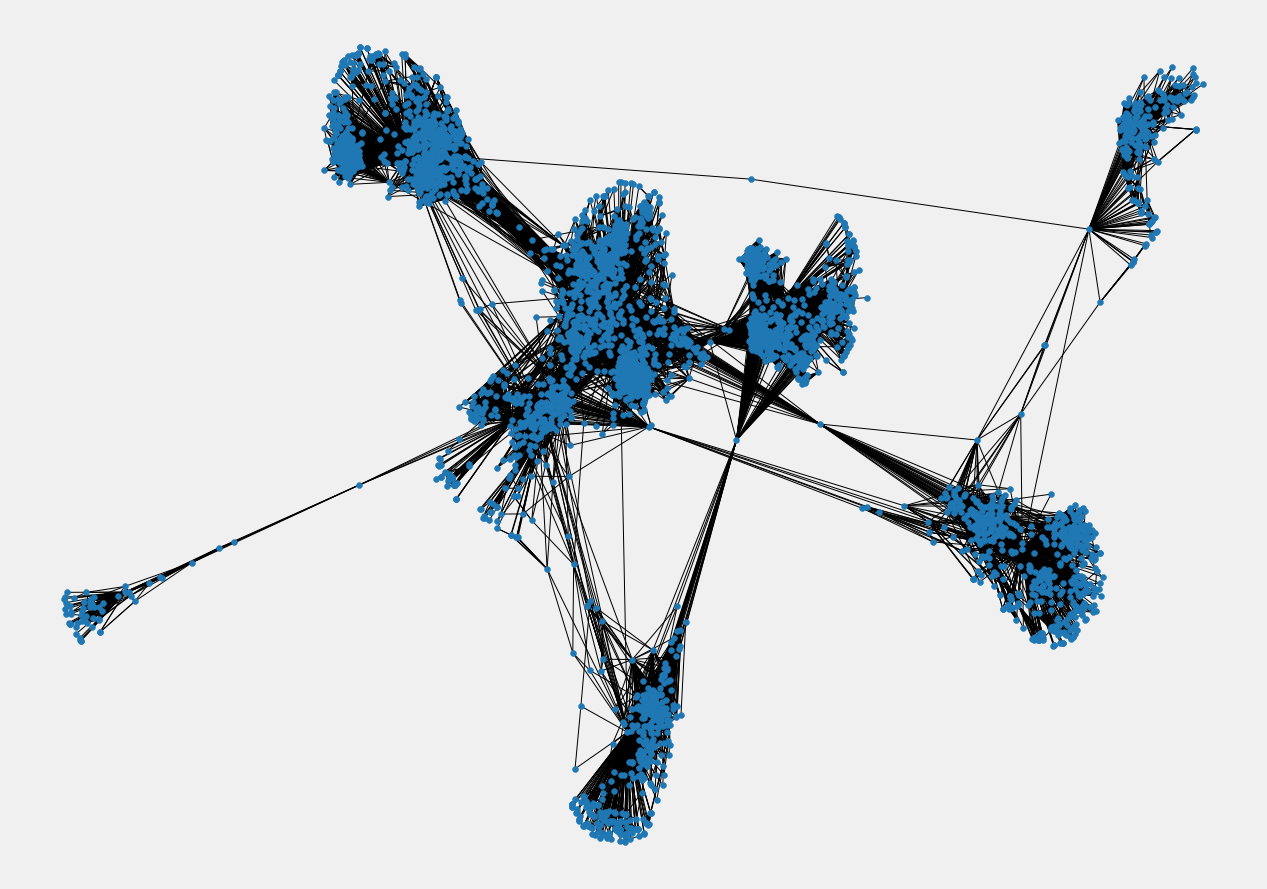

In [ ]:
# show network:
pos = nx.spring_layout(gg)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(gg, pos, with_labels = False, node_size = 35)
plt.show()

In [ ]:
max(deg)

1045.0

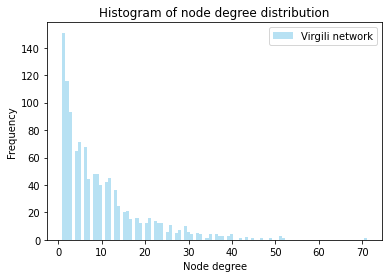

In [8]:
# node degree distribution:
deg = np.zeros((gg.number_of_nodes()))
        
j = 0        
for nd in gg.nodes():
    deg[j] = gg.degree(nd)
    j = j + 1

plt.figure(1)
plt.hist(deg, histtype='stepfilled', color = "skyblue", alpha=0.6, label = 'Virgili network', bins=100)

plt.title('Histogram of node degree distribution')
plt.xlabel('Node degree')
plt.ylabel('Frequency')


# plt.title('Histogram of node degree distribution', fontsize = 60)
# plt.xlabel('Node degree', fontsize = 60)
# plt.ylabel('Frequency', fontsize = 60)
# plt.rcParams['figure.figsize'] = [10, 8]

# # We change the fontsize of minor ticks label 
# plt.tick_params(axis='both', which='major', labelsize=40)
# plt.tick_params(axis='both', which='minor', labelsize=40)
# plt.rc('legend',fontsize=40)


plt.legend()
plt.show()

In [9]:
np.mean(deg)

9.62224183583407

In [10]:
np.median(deg)

7.0

In [11]:
scipy.stats.mode(deg)

ModeResult(mode=array([1.]), count=array([151]))

In [ ]:
# # low rankness:
from scipy.sparse.csgraph import dijkstra

A = nx.adjacency_matrix(fb)
D = np.array(dijkstra(A))
np.savetxt('/content/drive/MyDrive/PhD work/data/undirected networks/facebook/dHp.txt', D)

In [ ]:
# D = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/facebook/dHp.txt')
D = np.loadtxt('/content/drive/MyDrive/PhD work/data/undirected networks/virgili emails/dHp.txt')

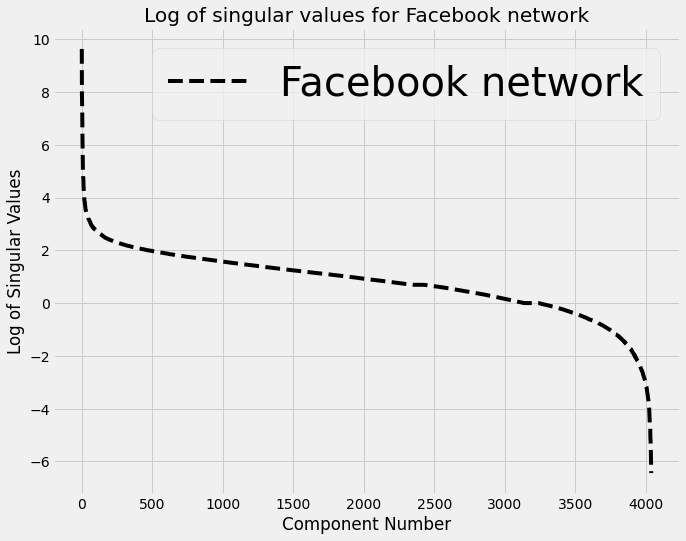

In [ ]:
[u,S,vt] = np.linalg.svd(D)
ln_sv = S
ln_sv = np.log(S)
plt.plot( ln_sv, 'k--',  label='Facebook network')
plt.title('Log of singular values for Facebook network')
plt.ylabel('Log of Singular Values')
plt.xlabel('Component Number')
plt.legend(loc='upper right') 

plt.show()